**Tugas Praktikum**

Wildan Hafidz Mauludin

2141720007

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, ```voice.csv```. 
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data ```spam.csv```
    2. Fitur ```CountVectorizer``` dengan mengaktifkan **stop_words**
    3. Evaluasi hasilnya  
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data ```spam.csv```
    2. Fitur ```TF-IDF``` dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data ```spam.csv```

**1. Klasifikasi Data Suara dengan SVM**

Import Library dan Load Data

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("Dataset/voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Analisis Bentuk Data

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [126]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [127]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Dari hasil analisis data voice.csv didapatkan data label bertipe object sehingga perlu dilakukan encoding.

Encode Label

In [128]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int3

Visualisasi Distribusi Fitur-Fitur Suara

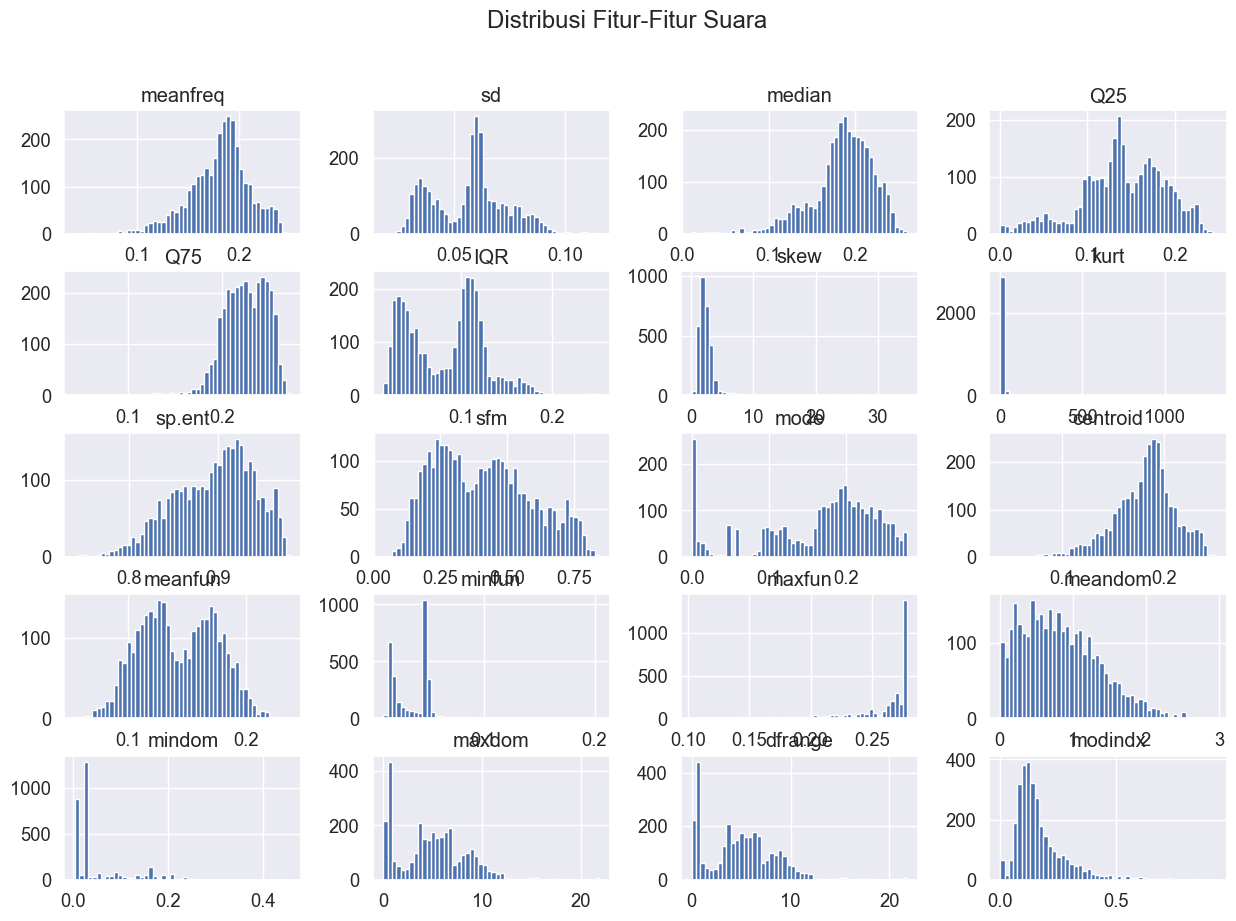

In [130]:
data['label'].value_counts()
data.drop('label', axis=1).hist(bins=50, figsize=(15, 10))
plt.suptitle('Distribusi Fitur-Fitur Suara')
plt.show()

In [131]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

Heatmap Korelasi untuk membantu melihat ketergantungan setiap variabel

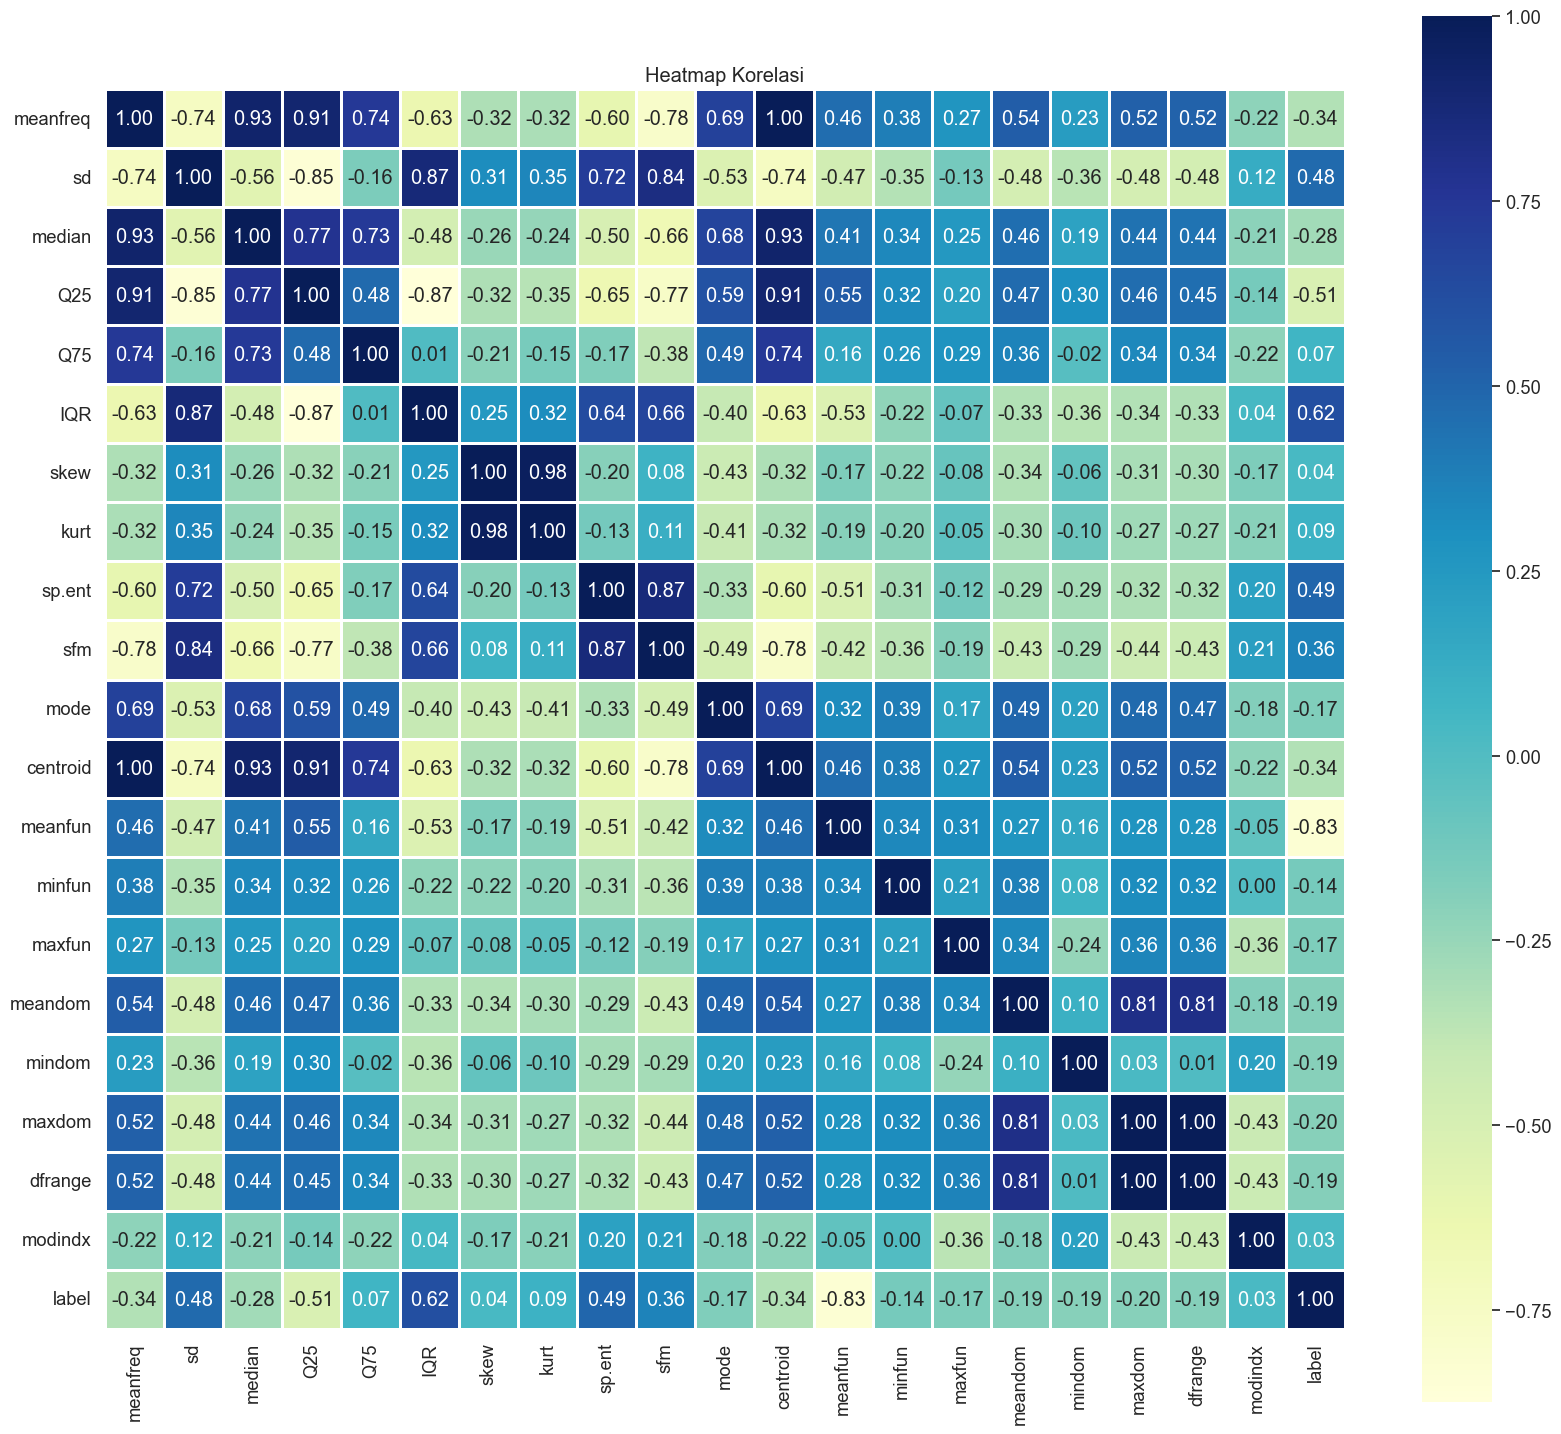

In [132]:
plt.figure(figsize=(20, 18))
corr_matrix = data.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True)
plt.title('Heatmap Korelasi')
plt.show()

Dari Heatmap diatas dapat dilihat bahwa meanfreq dan centroid memiliki nilai yang sama menunjukkan adanya multicollinearity.

Pemisahan Fitur dan Label

In [133]:
X = data.drop('label', axis=1)
y = data['label']

Split Data Train dan Data Test

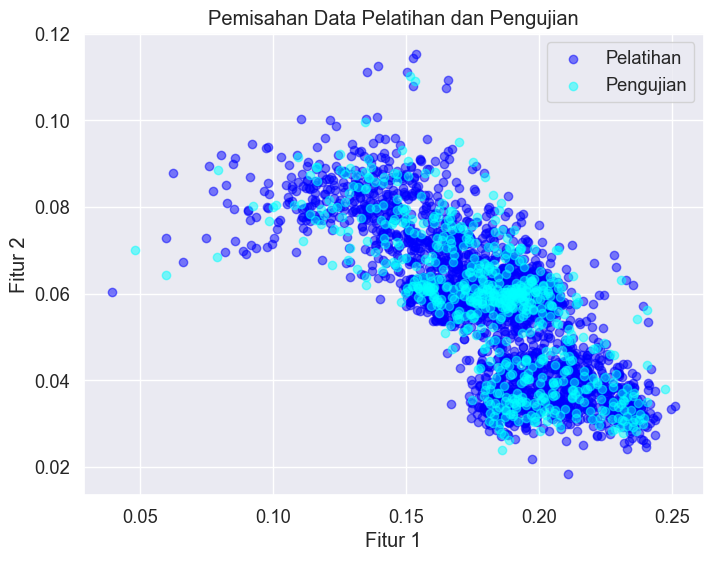

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='blue', label='Pelatihan', alpha=0.5)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c='cyan', label='Pengujian', alpha=0.5)
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(loc='best')
plt.title('Pemisahan Data Pelatihan dan Pengujian')
plt.show()

Training dan Evaluasi Model SVM

In [135]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svm_classifier = SVC(kernel='linear')

In [136]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['label'], axis=1))
scaled_features

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

Melakukan split data menjadi data training dan data testing dengan perbandingan 80:20.

In [137]:
from sklearn.model_selection import train_test_split

X = scaled_features
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [138]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [139]:
svm_model = SVC(kernel='linear', C=5)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {int(acc * 100)}%')

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       299
           1       0.98      0.99      0.99       335

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**2. Klasfikasi Multinomial Naive Bayes dengan Fitur CountVectorizer**

Import Library dan Load Data

In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data_spam = pd.read_csv("Dataset/spam.csv", encoding="latin-1")
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Analisis Bentuk Data

In [141]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [142]:
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [143]:
data_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Delete data yang tidak diperlukan karena terdapat data yang bernilai "NaN", maka perlu dilakukan penghapusan data tersebut.

In [144]:
data_spam.drop(data_spam.iloc[:, 2:], axis=1, inplace=True)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom V1 dan V2

In [145]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data_spam = data_spam.rename(columns=new_cols)

data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Inspeksi Data

In [146]:
print(data_spam['Labels'].value_counts())
print('\n')

print(data_spam.info())
print('\n')

print(data_spam.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encode Label

In [147]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data_spam['Labels'] = data_spam['Labels'].map(new_labels)
data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Memisahkan Fitur dengan Label

In [148]:
X = data_spam['SMS'].values
y = data_spam['Labels'].values

Pemisahan Data Train dan Data Test

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Ekstraksi Fitur dengan CountVectorizer

In [150]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [151]:
print(len(vectorizer.get_feature_names_out()))
print(f'Data Dimension: {X_train.shape}')

7466
Data Dimension: (4457, 7466)


Training Model Multinomial Naive Bayes

In [152]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Prediksi Model

In [153]:
y_pred_train = nb_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred_test = nb_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')

accuracyCount = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(acc * 100)}%')

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9829596412556054
Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**3. Klasfikasi Multinomial Naive Bayes dengan Fitur TF-IDF**

Import Data, Load Data, dan Drop Kolom

In [154]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari file CSV
data_spam = pd.read_csv("Dataset/spam.csv", encoding="latin-1")
data_spam = data_spam.drop(data_spam.iloc[:, 2:], axis=1)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama Kolom V1 dan V2

In [155]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data_spam = data_spam.rename(columns=new_cols)

data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Inspeksi Data

In [156]:
print(data_spam['Labels'].value_counts())
print('\n')

print(data_spam.info())
print('\n')

print(data_spam.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encode Label

Mengubah label menjadi angka 1 atau 0

In [157]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data_spam['Labels'] = data_spam['Labels'].map(new_labels)

data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Memisahkan Fitur dengan Label

In [158]:
X = data_spam['SMS'].values
y = data_spam['Labels'].values

Pemisahan Data Train dan Data Test

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Ekstraksi Fitur dengan TF-IDF

In [160]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [161]:
print(len(tfidf_vectorizer.get_feature_names_out()))
print(f'Data Dimension: {X_train_tfidf.shape}')

7466
Data Dimension: (4457, 7466)


Training Model Multinomial Naive Bayes dengan TF-IDF

In [162]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

Evaluasi Model dengan TF-IDF

In [163]:
y_pred_train_tfidf = nb_model.predict(X_train_tfidf)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = nb_model.predict(X_test_tfidf)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')

accuracyTF = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(acc * 100)}%')

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9757847533632287
Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



**Kesimpulan**

Akurasi yang didapatkan dari penggunaan CountVectorizer dan TF-IDF Vectorizer:

- CountVectorizer : 0.9829596412556054
- TF-IDF Vectorizer : 0.9757847533632287

Dapat dilihat, akurasi dari penggunaan CoutVectorizer dan TF-IDF Vectorizer relatif sama meskipun akurasi pada CountVectorizer lebih tinggi sedikit.

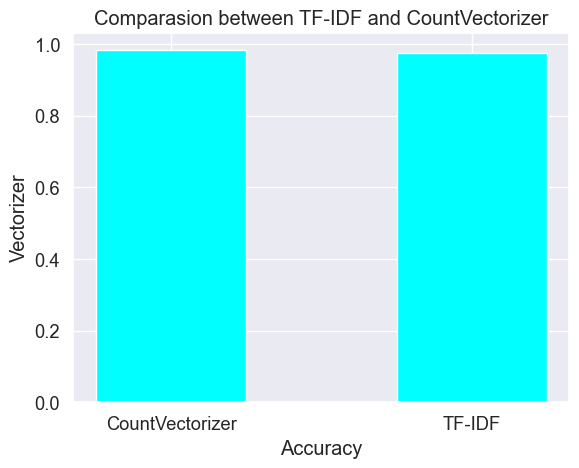

In [164]:
plt.bar(['CountVectorizer', 'TF-IDF'], [accuracyCount, accuracyTF], color='cyan', width=0.5)
plt.title('Comparasion between TF-IDF and CountVectorizer')
plt.xlabel('Accuracy')
plt.ylabel('Vectorizer')
plt.show()

- Dalam tugas kedua, kita menggunakan CountVectorizer untuk menghasilkan fitur berdasarkan frekuensi kata-kata.
- Dalam tugas ini digunakan TfidfVectorizer untuk menghasilkan fitur berdasarkan bobot TF-IDF kata-kata.
- Untuk menentukan fitur mana yang terbaik, kita harus mempertimbangkan hasil evaluasi, terutama akurasi dan metrik lainnya.
- Dalam kasus ini hasil evaluasi dengan CountVectorizer seringkali lebih baik daripada dengan TfidfVectorizer (TF-IDF) dilihat dari nilai akurasinya karena pada data tersebut memiliki teks sederhana. Namun, hasil ini juga tergantung pada karakteristik data yang digunakan.
- Kesimpulan akhir tentang fitur mana yang terbaik akan bergantung pada dataset dan tujuan analisisnya. Dalam banyak kasus, penggunaan TF-IDF bisa lebih unggul. Namun dalam kasus-kasus sederhana CountVectorizer masih bisa unggul.